In [1]:
import pandas as pd
import geopandas as gp
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pylab as pl
%matplotlib inline
import seaborn as sns
import fiona
import json

In [2]:
file = gp.read_file("countries.json")

In [3]:
file.head()

,scalerank,featurecla,LABELRANK,SOVEREIGNT,SOV_A3,ADM0_DIF,LEVEL,TYPE,ADMIN,ADM0_A3,...,REGION_WB,NAME_LEN,LONG_LEN,ABBREV_LEN,TINY,HOMEPART,MIN_ZOOM,MIN_LABEL,MAX_LABEL,geometry
0,1,Admin-0 country,3,Afghanistan,AFG,0,2,Sovereign country,Afghanistan,AFG,...,South Asia,11,11,4,-99,1,0.0,3.0,7.0,"POLYGON ((61.21081709172574 35.65007233330923,..."
1,1,Admin-0 country,3,Angola,AGO,0,2,Sovereign country,Angola,AGO,...,Sub-Saharan Africa,6,6,4,-99,1,0.0,3.0,7.0,(POLYGON ((23.21504845550606 -17.5231161434659...
2,1,Admin-0 country,6,Albania,ALB,0,2,Sovereign country,Albania,ALB,...,Europe & Central Asia,7,7,4,-99,1,0.0,5.0,10.0,"POLYGON ((21.0200403174764 40.84272695572588, ..."
3,1,Admin-0 country,4,United Arab Emirates,ARE,0,2,Sovereign country,United Arab Emirates,ARE,...,Middle East & North Africa,20,20,6,-99,1,0.0,4.0,9.0,"POLYGON ((51.57951867046327 24.24549713795111,..."
4,1,Admin-0 country,2,Argentina,ARG,0,2,Sovereign country,Argentina,ARG,...,Latin America & Caribbean,9,9,4,-99,1,0.0,2.0,7.0,(POLYGON ((-66.95992000000001 -54.896810000000...


#### This dataset has a lot of unnecessary columns, so either drop thecolumns or create a new dataframe.

In [4]:
countries = file[['ISO_A3','NAME','CONTINENT','POP_EST','GDP_MD_EST','geometry']]
countries.head()

,ISO_A3,NAME,CONTINENT,POP_EST,GDP_MD_EST,geometry
0,AFG,Afghanistan,Asia,34124811,64080.0,"POLYGON ((61.21081709172574 35.65007233330923,..."
1,AGO,Angola,Africa,29310273,189000.0,(POLYGON ((23.21504845550606 -17.5231161434659...
2,ALB,Albania,Europe,3047987,33900.0,"POLYGON ((21.0200403174764 40.84272695572588, ..."
3,ARE,United Arab Emirates,Asia,6072475,667200.0,"POLYGON ((51.57951867046327 24.24549713795111,..."
4,ARG,Argentina,South America,44293293,879400.0,(POLYGON ((-66.95992000000001 -54.896810000000...


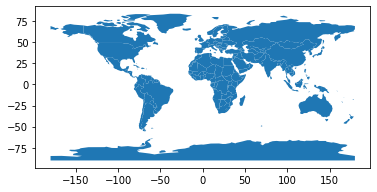

In [5]:
countries.plot()

In [6]:
type(countries)

geopandas.geodataframe.GeoDataFrame

In [7]:
countries.geometry.head()

0    POLYGON ((61.21081709172574 35.65007233330923,...
1    (POLYGON ((23.21504845550606 -17.5231161434659...
2    POLYGON ((21.0200403174764 40.84272695572588, ...
3    POLYGON ((51.57951867046327 24.24549713795111,...
4    (POLYGON ((-66.95992000000001 -54.896810000000...
Name: geometry, dtype: object

In [8]:
type(countries.geometry)

geopandas.geoseries.GeoSeries

In [9]:
countries.geometry.area.head()

0     64.457089
1    103.175373
2      3.101269
3      7.279589
4    276.833028
dtype: float64

In [10]:
countries.describe()

,POP_EST,GDP_MD_EST
count,1.770000e+02,1.770000e+02
mean,4.171237e+07,6.668967e+05
std,1.459691e+08,2.289440e+06
min,1.400000e+02,1.600000e+01
25%,3.360148e+06,2.581000e+04
50%,9.961396e+06,8.493000e+04
75%,2.938430e+07,4.104000e+05
max,1.379303e+09,2.114000e+07


In [11]:
countries.NAME.values

array(['Afghanistan', 'Angola', 'Albania', 'United Arab Emirates',
       'Argentina', 'Armenia', 'Antarctica', 'Fr. S. Antarctic Lands',
       'Australia', 'Austria', 'Azerbaijan', 'Burundi', 'Belgium',
       'Benin', 'Burkina Faso', 'Bangladesh', 'Bulgaria', 'Bahamas',
       'Bosnia and Herz.', 'Belarus', 'Belize', 'Bolivia', 'Brazil',
       'Brunei', 'Bhutan', 'Botswana', 'Central African Rep.', 'Canada',
       'Switzerland', 'Chile', 'China', "Côte d'Ivoire", 'Cameroon',
       'Dem. Rep. Congo', 'Congo', 'Colombia', 'Costa Rica', 'Cuba',
       'N. Cyprus', 'Cyprus', 'Czechia', 'Germany', 'Djibouti', 'Denmark',
       'Dominican Rep.', 'Algeria', 'Ecuador', 'Egypt', 'Eritrea',
       'Spain', 'Estonia', 'Ethiopia', 'Finland', 'Fiji', 'Falkland Is.',
       'France', 'Gabon', 'United Kingdom', 'Georgia', 'Ghana', 'Guinea',
       'Gambia', 'Guinea-Bissau', 'Eq. Guinea', 'Greece', 'Greenland',
       'Guatemala', 'Guyana', 'Honduras', 'Croatia', 'Haiti', 'Hungary',
       'Indo

* We can also apply all pandas function in geodataframe. Let's try filtering:

In [12]:
Australia = countries[countries['NAME']== 'Australia']

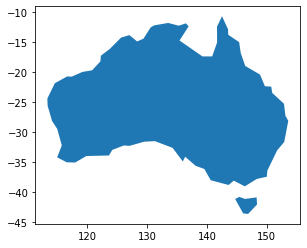

In [13]:
Australia.plot()

In [14]:
boundary_lines = gp.read_file("boundary_lines.json")

In [15]:
boundary_lines.head()

,scalerank,featurecla,name,name_alt,min_zoom,geometry
0,1,International boundary (verify),,,0,"LINESTRING (-67.10668 -22.73592, -67.82818 -22..."
1,1,International boundary (verify),,,0,"LINESTRING (-130.53611 54.80278000000001, -129..."
2,1,International boundary (verify),,,0,"LINESTRING (-117.12776 32.53534000000001, -115..."
3,1,International boundary (verify),,,0,"LINESTRING (-90.09555 13.73534, -90.0646699999..."
4,1,International boundary (verify),,,0,"LINESTRING (-92.22775999999999 14.53883, -92.0..."


In [16]:
cities = gp.read_file("World_Cities.json")
cities.head()

,ObjectID,CITY_NAME,GMI_ADMIN,ADMIN_NAME,FIPS_CNTRY,CNTRY_NAME,STATUS,POP,POP_RANK,POP_CLASS,PORT_ID,LABEL_FLAG,geometry
0,2000,Kamphaeng Phet,THA-KPH,Kamphaeng Phet,TH,Thailand,Provincial capital,58787,6,"50,000 to 99,999",0,1,POINT (99.52900241178098 16.4729969705553)
1,2324,Cabinda,AGO-CBN,Cabinda,AO,Angola,Provincial capital,66020,6,"50,000 to 99,999",46490,1,POINT (12.1899962933183 -5.556995944764289)
2,2001,Phichit,THA-PHC,Phichit,TH,Thailand,Provincial capital,35760,7,"Less than 50,000",0,1,POINT (100.3490014126757 16.43900397924727)
3,2325,Onjiva,AGO-CUN,Cunene,AO,Angola,Provincial capital,10169,7,"Less than 50,000",0,0,POINT (15.78330035729476 -17.04999592320635)
4,2432,Kimberley,ZAF-NCP,Northern Cape,SF,South Africa,Provincial capital,142089,5,"100,000 to 249,999",0,0,POINT (24.83000140841427 -28.65999599278834)


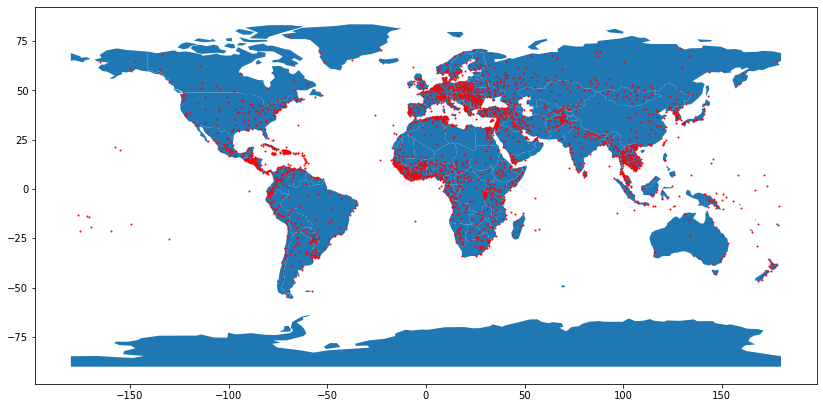

In [20]:
fig, ax = plt.subplots(figsize=(14, 12))
countries.plot(ax=ax)
cities.plot(markersize=1, color='red',ax=ax)
plt.show()

## CO-ORDINATES AND PROJECTIONS

In [21]:
countries.crs

{'init': 'epsg:4326'}

In [22]:
countries.geometry[:5]

0    POLYGON ((61.21081709172574 35.65007233330923,...
1    (POLYGON ((23.21504845550606 -17.5231161434659...
2    POLYGON ((21.0200403174764 40.84272695572588, ...
3    POLYGON ((51.57951867046327 24.24549713795111,...
4    (POLYGON ((-66.95992000000001 -54.896810000000...
Name: geometry, dtype: object

### EPSG stands for European Petroleum Survey Group, it maintains spatial reference systems. 
To keep longitude lines straight and maintain the 90° angle between the latitude and longitude lines, the Mercator projection uses varying distances between latitude lines away from the equator.

In [39]:
countries_proj = countries.to_crs({'init':'epsg:3857'})

In [40]:
countries_proj.geometry[:5]

0    POLYGON ((6813956.989691115 4252578.078492661,...
1    (POLYGON ((2584287.372808106 -1981804.82764273...
2    POLYGON ((2339940.184595553 4989171.529176487,...
3    POLYGON ((5741805.75375812 2783351.666515606, ...
4    (POLYGON ((-7453944.197958336 -7341864.7391144...
Name: geometry, dtype: object

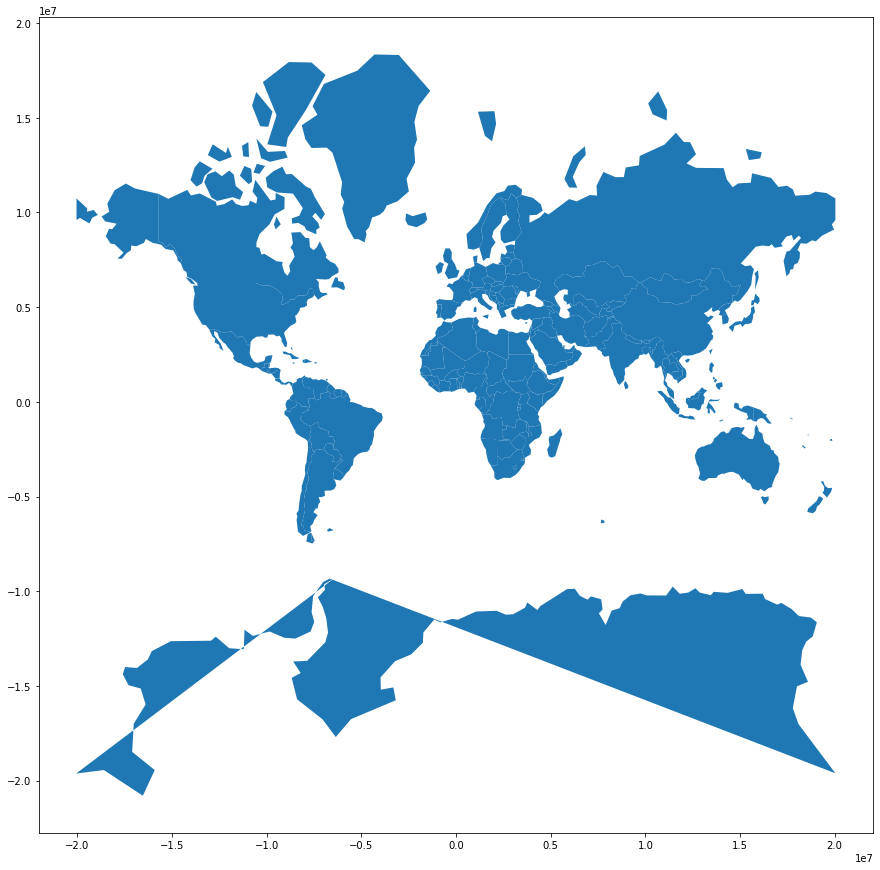

In [41]:
countries_proj.plot(figsize=(25,15))

In [42]:
cities.geometry[:5]

0      POINT (99.52900241178098 16.4729969705553)
1     POINT (12.1899962933183 -5.556995944764289)
2     POINT (100.3490014126757 16.43900397924727)
3    POINT (15.78330035729476 -17.04999592320635)
4    POINT (24.83000140841427 -28.65999599278834)
Name: geometry, dtype: object

In [48]:
cities_proj = cities.to_crs({'init':'epsg:3857'})

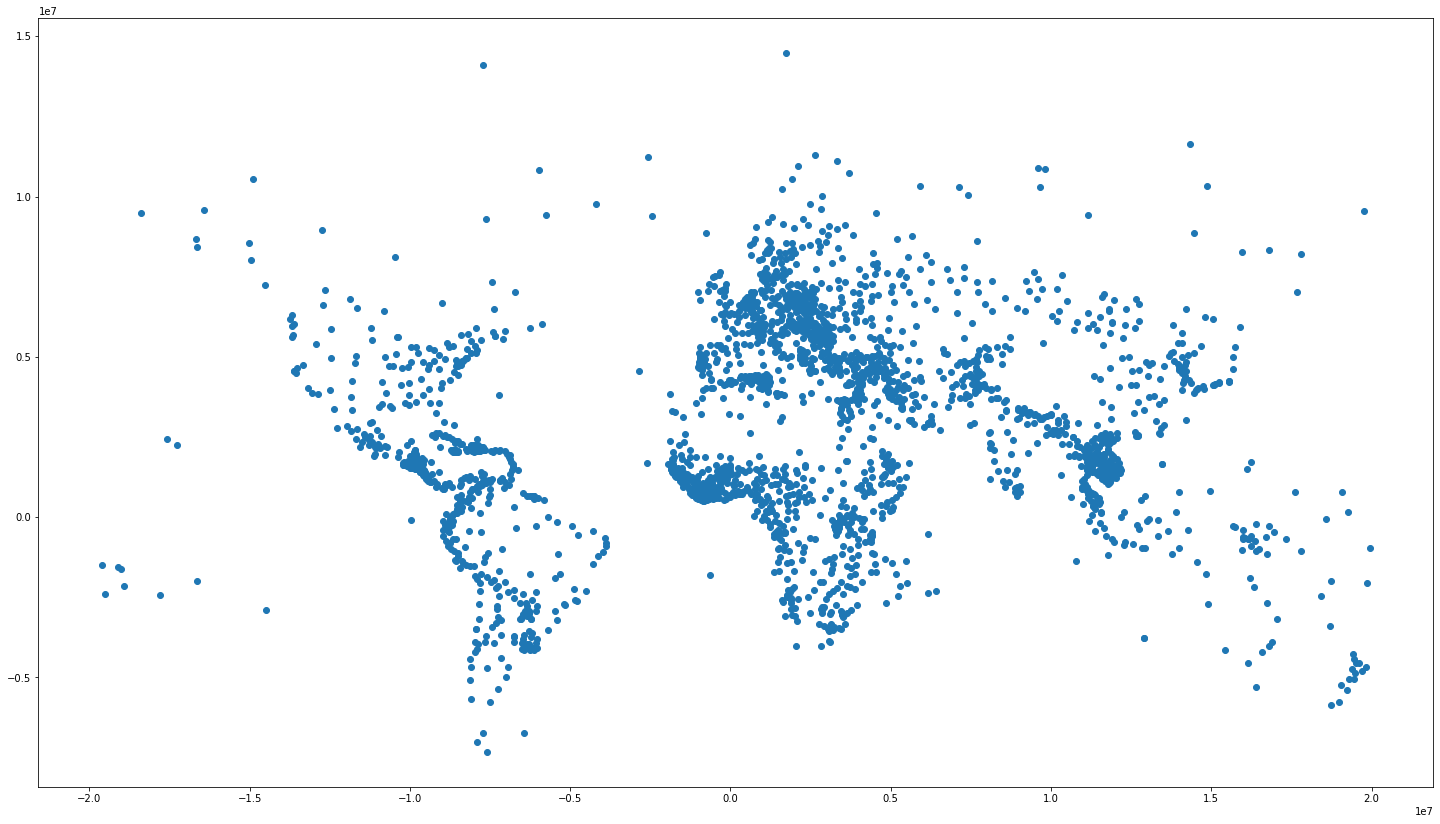

In [49]:
cities_proj.plot(figsize=(25,15))

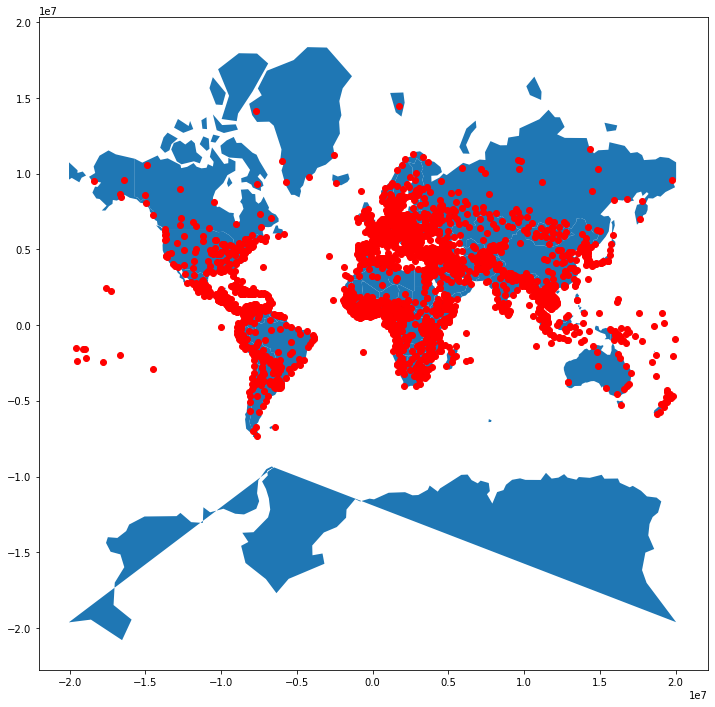

In [50]:
fig, ax = plt.subplots(figsize=(14,12))
countries_proj.plot(ax=ax)
# Cities are still in WGS84
cities_proj.plot(ax=ax, color='red'); 